In [82]:
import os
import numpy as np


polynomial_accuracies_path = os.path.join(os.getcwd(),'logs','fashion_mnist','summaries','learning_rate_searches',
                               'polynomial_trainable')
arr = 0
for path, directories, files in os.walk(polynomial_accuracies_path):
    #print('found %s' % os.path.join(path, files))
    if 'numpy_accuracies.npy' and 'numpy_learning_rates.npy' in files:
        print('found %s' % os.path.join(path, 'numpy_accuracies.npy'))
        polynomial_accuracies = np.load(os.path.join(path, 'numpy_accuracies.npy'))
        print('found %s' % os.path.join(path, 'numpy_learning_rates.npy'))
        polynomial_learning_rates = np.load(os.path.join(path, 'numpy_learning_rates.npy'))
        
linear_accuracies_path = os.path.join(os.getcwd(),'logs','fashion_mnist','summaries','learning_rate_searches',
                               'linear')
arr = 0
for path, directories, files in os.walk(linear_accuracies_path):
    #print('found %s' % os.path.join(path, files))
    if 'numpy_accuracies.npy' and 'numpy_learning_rates.npy' in files:
        print('found %s' % os.path.join(path, 'numpy_accuracies.npy'))
        linear_accuracies = np.load(os.path.join(path, 'numpy_accuracies.npy'))
        print('found %s' % os.path.join(path, 'numpy_learning_rates.npy'))
        linear_learning_rates = np.load(os.path.join(path, 'numpy_learning_rates.npy'))
        

found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/22_11_2020_21_39_14/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/22_11_2020_21_39_14/numpy_learning_rates.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/linear/22_11_2020_21_39_14/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/linear/22_11_2020_21_39_14/numpy_learning_rates.npy


In [88]:
print(polynomial_accuracies)
print(linear_accuracies)

[[0.89428574 0.89328569 0.88235712 0.87857145 0.87478572 0.85557145
  0.83585715]
 [0.87849998 0.88671428 0.88642859 0.87514287 0.86985713 0.85735714
  0.84757143]
 [0.889      0.88150001 0.88314283 0.88042855 0.87021428 0.8635
  0.84035712]
 [0.89085716 0.89235717 0.88814288 0.88571429 0.87492859 0.85735714
  0.83499998]
 [0.89014286 0.88692856 0.88621426 0.87928569 0.86892855 0.86371428
  0.83807141]]
[[0.89428574 0.89328569 0.88235712 0.87857145 0.87478572 0.85557145
  0.83585715]
 [0.87849998 0.88671428 0.88642859 0.87514287 0.86985713 0.85735714
  0.84757143]
 [0.889      0.88150001 0.88314283 0.88042855 0.87021428 0.8635
  0.84035712]
 [0.89085716 0.89235717 0.88814288 0.88571429 0.87492859 0.85735714
  0.83499998]
 [0.89014286 0.88692856 0.88621426 0.87928569 0.86892855 0.86371428
  0.83807141]]


In [89]:
print(polynomial_learning_rates)
print(linear_learning_rates)

[[0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]
 [0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]
 [0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]
 [0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]
 [0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]]
[[0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]
 [0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]
 [0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]
 [0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]
 [0.01       0.005      0.0025     0.00125    0.000625   0.0003125
  0.00015625]]


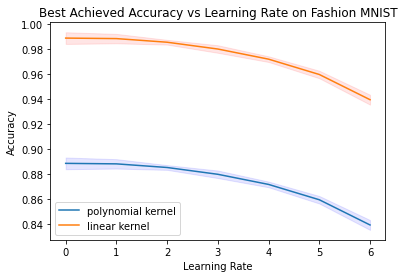

In [100]:
from matplotlib import pyplot as plt
import numpy as np
import math


def get_confidence_interval_and_mean(x, y):
    confidence_interval = 1.96 * np.std(y, axis=0)/math.sqrt(y.shape[1])
    mean = np.mean(y, axis=0)
    return confidence_interval, mean

polynomial_ci, polynomial_mean = get_confidence_interval_and_mean(list(range(polynomial_accuracies.shape[0])), 
                                                               polynomial_accuracies)

linear_ci, linear_mean = get_confidence_interval_and_mean(list(range(linear_accuracies.shape[0])), 
                                                               linear_accuracies)
linear_mean = linear_mean + np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1])

fig, ax = plt.subplots()
ax.plot(x,polynomial_mean)
ax.fill_between(x, (polynomial_mean-ci), (polynomial_mean+ci), color='b', alpha=.1)
ax.plot(x,linear_mean)
ax.fill_between(x, (linear_mean-ci), (linear_mean+ci), color='r', alpha=.1)

plt.title('Best Achieved Accuracy vs Learning Rate on Fashion MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend(['polynomial kernel', 'linear kernel'], loc='lower left')
plt.show()